In [1]:
from prep_vis import *

In [16]:
import random
from torch import FloatTensor
from albumentations import (HorizontalFlip, Blur, GaussNoise, RandomCrop, RandomContrast, BboxParams, Rotate, Compose)
from albumentations.pytorch import ToTensor
import numpy as np
from torchvision.transforms import ToPILImage

class Aug_Wrap():
    def __init__(self, alb_aug):
        self.aug = alb_aug
        
    def __call__(self, i, t):
        dic = {}
        dic['image'] = np.asarray(i).astype('uint8')#np.moveaxis(np.asarray(i), 0, 1)
        dic['bboxes'] = t['boxes']
        dic['labels'] = t['labels']
        augmented = self.aug(**dic)
        i = augmented['image']
        t['boxes'] = FloatTensor(np.array(augmented['bboxes']))
        t['labels'] = augmented['labels']
        return i, t

def get_aug(min_area=0., min_visibility=0., train=True):
    aug_test = [ToTensor()]
    aug = [HorizontalFlip(p=0.5), Blur(p=0.5),
           GaussNoise(p = 0.5),
           RandomCrop(height = random.randint(350, 480), width = random.randint(500, 640), p = 0.5),
           RandomContrast(p = 0.5),
           Rotate(p = 0.5, limit = 10),
           ToTensor()]
    if train:
        comp = Compose(aug, bbox_params=BboxParams(format='pascal_voc',
                                                   min_area=min_area,
                                                   min_visibility=min_visibility,
                                                   label_fields=['labels']))
        return Aug_Wrap(comp)
    else:
        comp =  Compose(aug_test, bbox_params=BboxParams(format='pascal_voc',
                                                         min_area=min_area,
                                                         min_visibility=min_visibility,
                                                         label_fields=['labels']))
        return Aug_Wrap(comp)


In [17]:
train = CocoDetection_(root = "images",
                       annFile = "train.json",
                       transforms=get_aug())

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


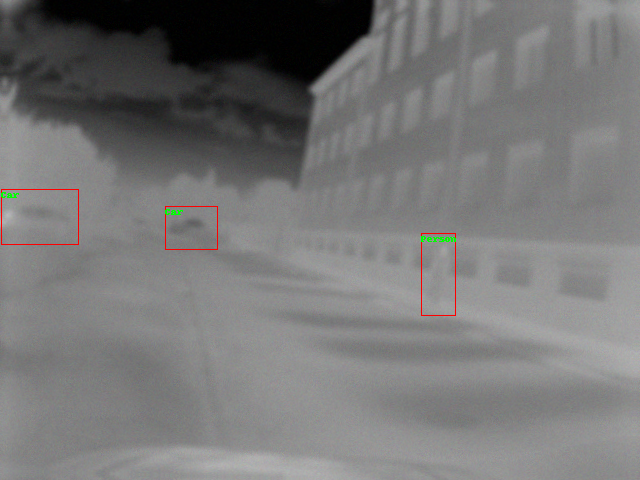

In [32]:
visualize_boxes(train[0])

In [114]:
rows, cols = dic["image"].shape[:2]

NameError: name 'dic' is not defined

In [23]:
from torchvision.transforms import ToTensor
get_aug([HorizontalFlip()])(ToTensor()(train[0][0]).numpy())

AssertionError: force_apply must have bool or int type

In [22]:
(ToTensor()(train[0][0]))

tensor([[[0.3529, 0.3490, 0.3569,  ..., 0.3294, 0.3333, 0.3333],
         [0.3529, 0.3529, 0.3529,  ..., 0.3529, 0.3804, 0.3686],
         [0.3608, 0.3608, 0.3490,  ..., 0.3647, 0.3412, 0.3451],
         ...,
         [0.4039, 0.4039, 0.3922,  ..., 0.2745, 0.2706, 0.2510],
         [0.4118, 0.4157, 0.3882,  ..., 0.3098, 0.2784, 0.2706],
         [0.4078, 0.4118, 0.3765,  ..., 0.3137, 0.2980, 0.2941]],

        [[0.3529, 0.3490, 0.3569,  ..., 0.3294, 0.3333, 0.3333],
         [0.3529, 0.3529, 0.3529,  ..., 0.3529, 0.3804, 0.3686],
         [0.3608, 0.3608, 0.3490,  ..., 0.3647, 0.3412, 0.3451],
         ...,
         [0.4039, 0.4039, 0.3922,  ..., 0.2745, 0.2706, 0.2510],
         [0.4118, 0.4157, 0.3882,  ..., 0.3098, 0.2784, 0.2706],
         [0.4078, 0.4118, 0.3765,  ..., 0.3137, 0.2980, 0.2941]],

        [[0.3529, 0.3490, 0.3569,  ..., 0.3294, 0.3333, 0.3333],
         [0.3529, 0.3529, 0.3529,  ..., 0.3529, 0.3804, 0.3686],
         [0.3608, 0.3608, 0.3490,  ..., 0.3647, 0.3412, 0.

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


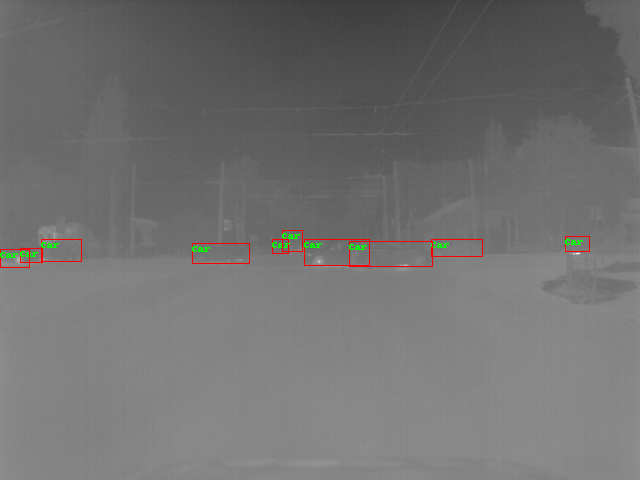

In [40]:
import transforms as T
from torchvision.transforms import ToPILImage
def get_transform(train):
    transforms = []
    # converts the image, a PIL image, into a PyTorch Tensor
    transforms.append(T.ToTensor())
    if train:
        # during training, randomly flip the training images
        # and ground-truth for data augmentation
        transforms.append(T.RandomHorizontalFlip(0.5))
    return T.Compose(transforms)

train = CocoDetection_(root = "images",
                       annFile = "train.json",
                       transforms=get_transform(train=False))
visualize_boxes([ToPILImage()(train[12][0]), train[12][1]])


loading annotations into memory...
Done (t=0.11s)
creating index...
index created!


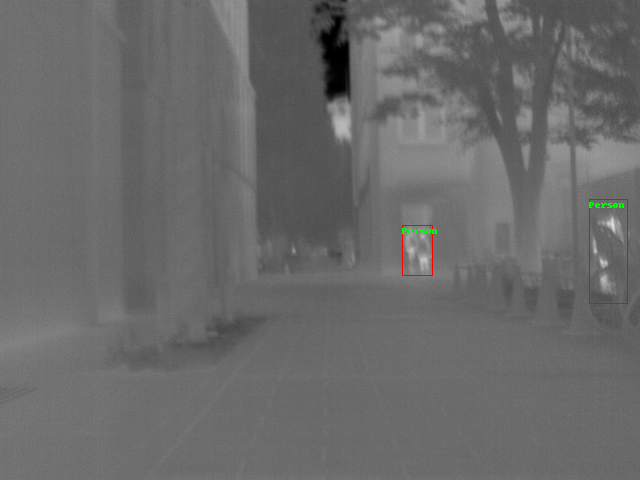

In [12]:
train = Pretrain(root = "fir",
                       annFile = "train_fir.json")
visualize_boxes(train[101])

In [4]:
import torch
import torchvision

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=False)
model.load_state_dict(torch.load("model_state_4_epochs"))
device = torch.device('cuda:1')
model.to(device)

FasterRCNN(
  (transform): GeneralizedRCNNTransform()
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d()
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d()
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d()
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d()
          (relu): ReLU(inplace=True)
          (downsample): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d()
          )
  

In [5]:
from engine import train_one_epoch, evaluate
import utils
import transforms as T


def get_transform(train):
    transforms = []
    # converts the image, a PIL image, into a PyTorch Tensor
    transforms.append(T.ToTensor())
    if train:
        # during training, randomly flip the training images
        # and ground-truth for data augmentation
        transforms.append(T.RandomHorizontalFlip(0.5))
    return T.Compose(transforms)

import torch
#device = torch.device('cuda:1') if torch.cuda.is_available() else torch.device('cpu')

In [6]:
# use our dataset and defined transformations
dataset = CocoDetection_(root="images", annFile="train.json",
                         transforms=get_aug(train=True))
dataset_test = CocoDetection_(root="images", annFile="train.json",
                              transforms=get_aug(train=False))

# split the dataset in train and test set
torch.manual_seed(1)
indices = torch.randperm(len(dataset)).tolist()
dataset = torch.utils.data.Subset(dataset, indices[:-50])
dataset_test = torch.utils.data.Subset(dataset_test, indices[-50:])

# define training and validation data loaders
data_loader = torch.utils.data.DataLoader(
    dataset, batch_size=2, shuffle=True, num_workers=4,
    collate_fn=utils.collate_fn)

data_loader_test = torch.utils.data.DataLoader(
    dataset_test, batch_size=1, shuffle=False, num_workers=4,
    collate_fn=utils.collate_fn)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [7]:
#device = torch.device('cuda:1') #if torch.cuda.is_available() else torch.device('cpu')

# our dataset has two classes only - background and person
num_classes = 3

#model.to(device)

# construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005,
                            momentum=0.9, weight_decay=0.0005)

# and a learning rate scheduler which decreases the learning rate by
# 10x every 3 epochs
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,
                                               step_size=3,
                                               gamma=0.1)

In [9]:
num_epochs = 5

for epoch in range(num_epochs):
        # train for one epoch, printing every 10 iterations
    train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq=10)
        # update the learning rate
    lr_scheduler.step()
        # evaluate on the test dataset
    evaluate(model, data_loader_test, device=device)

Epoch: [0]  [  0/182]  eta: 0:02:37  lr: 0.000033  loss: 0.0781 (0.0781)  loss_classifier: 0.0233 (0.0233)  loss_box_reg: 0.0199 (0.0199)  loss_objectness: 0.0029 (0.0029)  loss_rpn_box_reg: 0.0320 (0.0320)  time: 0.8666  data: 0.2679  max mem: 0
Epoch: [0]  [ 10/182]  eta: 0:00:43  lr: 0.000309  loss: 0.1303 (0.1221)  loss_classifier: 0.0516 (0.0514)  loss_box_reg: 0.0501 (0.0499)  loss_objectness: 0.0045 (0.0045)  loss_rpn_box_reg: 0.0110 (0.0163)  time: 0.2547  data: 0.0307  max mem: 0
Epoch: [0]  [ 20/182]  eta: 0:00:36  lr: 0.000585  loss: 0.1420 (0.1426)  loss_classifier: 0.0541 (0.0603)  loss_box_reg: 0.0501 (0.0525)  loss_objectness: 0.0039 (0.0053)  loss_rpn_box_reg: 0.0127 (0.0245)  time: 0.1932  data: 0.0070  max mem: 0
Epoch: [0]  [ 30/182]  eta: 0:00:32  lr: 0.000860  loss: 0.1824 (0.1708)  loss_classifier: 0.0689 (0.0714)  loss_box_reg: 0.0646 (0.0597)  loss_objectness: 0.0064 (0.0071)  loss_rpn_box_reg: 0.0247 (0.0327)  time: 0.1949  data: 0.0072  max mem: 0
Epoch: [0]  

Epoch: [1]  [ 80/182]  eta: 0:00:20  lr: 0.005000  loss: 0.2288 (0.2289)  loss_classifier: 0.1002 (0.0997)  loss_box_reg: 0.0772 (0.0799)  loss_objectness: 0.0052 (0.0108)  loss_rpn_box_reg: 0.0242 (0.0386)  time: 0.1959  data: 0.0068  max mem: 0
Epoch: [1]  [ 90/182]  eta: 0:00:18  lr: 0.005000  loss: 0.2076 (0.2215)  loss_classifier: 0.0852 (0.0956)  loss_box_reg: 0.0712 (0.0768)  loss_objectness: 0.0048 (0.0106)  loss_rpn_box_reg: 0.0284 (0.0384)  time: 0.1941  data: 0.0065  max mem: 0
Epoch: [1]  [100/182]  eta: 0:00:16  lr: 0.005000  loss: 0.1788 (0.2184)  loss_classifier: 0.0765 (0.0938)  loss_box_reg: 0.0599 (0.0759)  loss_objectness: 0.0032 (0.0105)  loss_rpn_box_reg: 0.0193 (0.0381)  time: 0.1942  data: 0.0064  max mem: 0
Epoch: [1]  [110/182]  eta: 0:00:14  lr: 0.005000  loss: 0.2174 (0.2205)  loss_classifier: 0.0800 (0.0962)  loss_box_reg: 0.0779 (0.0769)  loss_objectness: 0.0066 (0.0104)  loss_rpn_box_reg: 0.0209 (0.0370)  time: 0.1945  data: 0.0064  max mem: 0
Epoch: [1]  

Epoch: [2]  [160/182]  eta: 0:00:04  lr: 0.005000  loss: 0.1772 (0.2023)  loss_classifier: 0.0638 (0.0826)  loss_box_reg: 0.0761 (0.0738)  loss_objectness: 0.0049 (0.0085)  loss_rpn_box_reg: 0.0154 (0.0375)  time: 0.1948  data: 0.0069  max mem: 0
Epoch: [2]  [170/182]  eta: 0:00:02  lr: 0.005000  loss: 0.1734 (0.2026)  loss_classifier: 0.0707 (0.0837)  loss_box_reg: 0.0744 (0.0739)  loss_objectness: 0.0055 (0.0085)  loss_rpn_box_reg: 0.0154 (0.0366)  time: 0.1952  data: 0.0068  max mem: 0
Epoch: [2]  [180/182]  eta: 0:00:00  lr: 0.005000  loss: 0.2058 (0.2069)  loss_classifier: 0.0762 (0.0849)  loss_box_reg: 0.0744 (0.0754)  loss_objectness: 0.0087 (0.0085)  loss_rpn_box_reg: 0.0197 (0.0380)  time: 0.1954  data: 0.0068  max mem: 0
Epoch: [2]  [181/182]  eta: 0:00:00  lr: 0.005000  loss: 0.2204 (0.2070)  loss_classifier: 0.0744 (0.0849)  loss_box_reg: 0.0686 (0.0753)  loss_objectness: 0.0095 (0.0085)  loss_rpn_box_reg: 0.0212 (0.0383)  time: 0.1911  data: 0.0067  max mem: 0
Epoch: [2] T

Epoch: [4]  [  0/182]  eta: 0:01:33  lr: 0.000500  loss: 0.1260 (0.1260)  loss_classifier: 0.0572 (0.0572)  loss_box_reg: 0.0569 (0.0569)  loss_objectness: 0.0014 (0.0014)  loss_rpn_box_reg: 0.0104 (0.0104)  time: 0.5117  data: 0.3087  max mem: 0
Epoch: [4]  [ 10/182]  eta: 0:00:38  lr: 0.000500  loss: 0.1260 (0.1366)  loss_classifier: 0.0565 (0.0507)  loss_box_reg: 0.0446 (0.0441)  loss_objectness: 0.0034 (0.0045)  loss_rpn_box_reg: 0.0143 (0.0374)  time: 0.2225  data: 0.0338  max mem: 0
Epoch: [4]  [ 20/182]  eta: 0:00:33  lr: 0.000500  loss: 0.1169 (0.1281)  loss_classifier: 0.0551 (0.0528)  loss_box_reg: 0.0416 (0.0447)  loss_objectness: 0.0031 (0.0044)  loss_rpn_box_reg: 0.0148 (0.0262)  time: 0.1919  data: 0.0062  max mem: 0
Epoch: [4]  [ 30/182]  eta: 0:00:30  lr: 0.000500  loss: 0.1484 (0.1434)  loss_classifier: 0.0609 (0.0577)  loss_box_reg: 0.0463 (0.0495)  loss_objectness: 0.0030 (0.0050)  loss_rpn_box_reg: 0.0161 (0.0311)  time: 0.1905  data: 0.0062  max mem: 0
Epoch: [4]  

In [20]:
torch.save(model.state_dict(), "model_state_4_epochs")

In [ ]:
device

In [8]:
evaluate(model, data_loader_test, device=device)

Test:  [ 0/50]  eta: 0:00:28  model_time: 0.2995 (0.2995)  evaluator_time: 0.0018 (0.0018)  time: 0.5659  data: 0.2615  max mem: 0
Test:  [49/50]  eta: 0:00:00  model_time: 0.0370 (0.0428)  evaluator_time: 0.0021 (0.0037)  time: 0.0467  data: 0.0035  max mem: 0
Test: Total time: 0:00:02 (0.0586 s / it)
Averaged stats: model_time: 0.0370 (0.0428)  evaluator_time: 0.0021 (0.0037)
Accumulating evaluation results...
DONE (t=0.05s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.363
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.741
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.303
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.316
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.357
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.623
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ]

In [9]:

test = Test(root="images",
            annFile="test_info.json",
            transforms=get_transform(train=False))

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [24]:
model.eval()
preds = []
with torch.no_grad():
    for image, id in test:
        outputs = model([image.to(device)])
        outputs = [{k: v.to(torch.device('cpu')) for k, v in t.items()} for t in outputs]
        preds.append((id, outputs[0]))
    #torch.cuda.empty_cache()

In [25]:
def get_bbox(bbox):
    return [bbox[0], bbox[1], bbox[2] - bbox[0], bbox[3] - bbox[1]]
with open('output.json', "w") as f:
    f.write("[")
    for id, out in preds:
        out['boxes'] = out['boxes'].numpy()
        out['labels'] = out['labels'].numpy()
        out['scores'] = out['scores'].numpy()
        for k in range(len(out['labels'])):
            f.write('{"image_id": ' + str(id) + ", ")
            f.write('"category_id": ' + str(out['labels'][k]) + ", ")
            f.write('"bbox": ' + str(get_bbox(out['boxes'][k])) + ", ")
            f.write('"score": ' + str(out['scores'][k]) + "}, ")
    f.seek(f.tell() - 2, os.SEEK_SET)
    f.write(']')
    

In [16]:
preds

[{'boxes': tensor([[250.9182, 246.6511, 283.9086, 271.7288],
          [126.2712, 247.6513, 183.7169, 282.8350],
          [191.6227, 243.8434, 226.6980, 270.8004],
          [595.1060, 235.1190, 617.9084, 310.1059],
          [328.0247, 245.9909, 344.8474, 258.1284],
          [576.3970, 230.6239, 618.7540, 317.0557],
          [224.8421, 228.7024, 255.0508, 262.8054],
          [574.4158, 254.6751, 588.3925, 305.4624],
          [234.7507, 253.6264, 250.0840, 263.8937],
          [330.6338, 245.6496, 355.3157, 258.4998],
          [192.7691, 253.8184, 200.6232, 273.0845],
          [572.5269, 250.7957, 599.1564, 309.9261],
          [228.8271, 241.8398, 251.3321, 261.8099]]),
  'labels': tensor([2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2]),
  'scores': tensor([0.9982, 0.9970, 0.9895, 0.8609, 0.8502, 0.4884, 0.3248, 0.3038, 0.0931,
          0.0877, 0.0761, 0.0628, 0.0514])},
 {'boxes': tensor([[216.7183, 243.4216, 248.1315, 265.8491],
          [ 53.6540, 243.1134, 164.0822, 305.0087],
  

In [4]:
!git pull

Username for 'https://github.com': ^C
